<a href="https://colab.research.google.com/github/9295699214/Califoria-Housing-Prices/blob/main/California_Housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing packages and Drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data/California_Houses.csv')

In [4]:
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [5]:
data.shape

(20640, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [7]:
data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [8]:
data.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

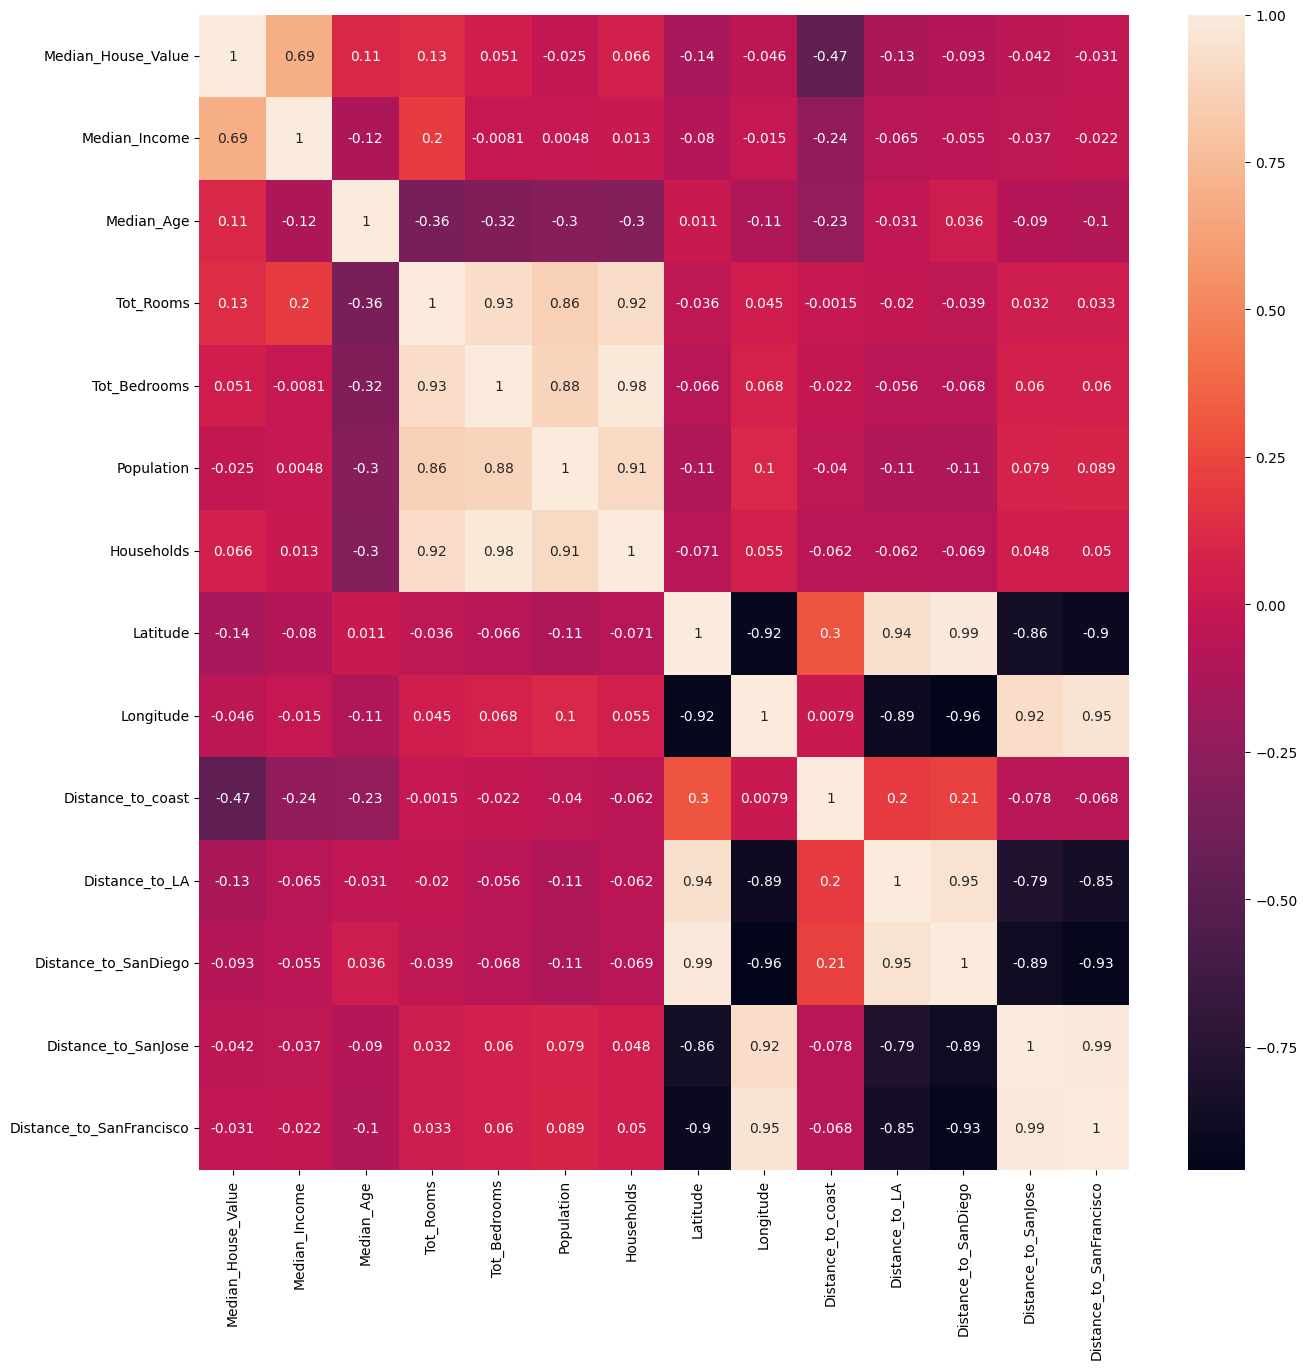

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot= True)
plt.show()

In [10]:
features = data.drop(['Median_Income'], axis = 1)
label = data['Median_Income']

In [11]:
X_train,X_test, y_train,y_test = train_test_split(features, label, test_size=0.3)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)


In [13]:
mse

1.2021645083403587

In [14]:
# Trying Standard Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data = scaler.fit_transform(data)

In [15]:
attributes = ['Median_House_Value',	'Median_Income',	'Median_Age',	'Tot_Rooms',	'Tot_Bedrooms',	'Population',	'Households',	'Latitude',	'Longitude',	'Distance_to_coast',	'Distance_to_LA',	'Distance_to_SanDiego',	'Distance_to_SanJose',	'Distance_to_SanFrancisco']
df = pd.DataFrame(new_data, columns = attributes)
print(df.shape)
X = df.drop(['Median_Income'], axis = 1)
y = df['Median_Income']
# X_train,X_test, y_train,y_test = train_test_split(features, label, test_size=0.3)
# print(X_test.shape)
# print(y_test.shape)
model = LinearRegression()
model.fit(X, y)
y_hat = model.predict(X)
mse = mean_squared_error(y, y_hat)

(20640, 14)


In [16]:
mse

0.3366980599323778

In [17]:
from scipy.stats import skew
X['Median_House_Value'] = np.sqrt(X['Median_House_Value'])
X['Tot_Rooms'] = np.sqrt(X['Tot_Rooms'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
attributes = ['Median_House_Value',	'Median_Income',	'Median_Age',	'Tot_Rooms',	'Tot_Bedrooms',	'Population',	'Households',	'Latitude',	'Longitude',	'Distance_to_coast',	'Distance_to_LA',	'Distance_to_SanDiego',	'Distance_to_SanJose',	'Distance_to_SanFrancisco']
df = pd.DataFrame(new_data, columns = attributes)
print(df.shape)
X = df.drop(['Median_Income'], axis = 1)
y = df['Median_Income']
# X_train,X_test, y_train,y_test = train_test_split(features, label, test_size=0.3)
# print(X_test.shape)
# print(y_test.shape)
model = LinearRegression()
model.fit(X, y)
y_hat = model.predict(X)
mse = mean_squared_error(y, y_hat)

(20640, 14)


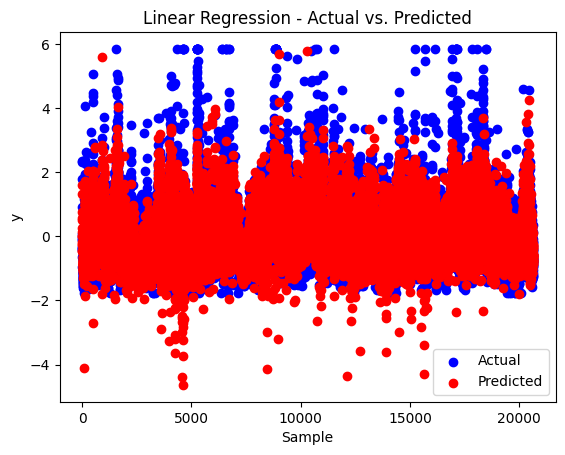

In [20]:
plt.scatter(range(len(y)), y, color='blue', label='Actual')
plt.scatter(range(len(y)), y_hat, color='red', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('y')
plt.title('Linear Regression - Actual vs. Predicted')
plt.legend()
plt.show()